# Used Car Price Prediction

Business Case

Machine Learning algorithms used in this project: Multiple Linear Regression, Random Forest Regression, XGBoost

Features: Make, Model, Type, Origin, Drivetrain, Invoice, EngineSize, Cylinders, Horsepower, 
    MPG_City, MPG_Highway, Weight, Wheelbase, Length
    
Target: Price
    
Dataset Source: https://www.kaggle.com/ljanjughazyan/cars1 


## Importing libraries


In [5]:
pip install xgboost wordcloud plotly

Note: you may need to restart the kernel to use updated packages.


In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS

## Exploring Dataset

In [23]:
# Reading csv file
car_df = pd.read_csv('cars_data.csv')

In [24]:
# loading first 10 instances
car_df.head(10)

Make                    Model    Type  Origin DriveTrain     MSRP  \
0  Acura                      MDX     SUV    Asia        All  $36,945   
1  Acura           RSX Type S 2dr   Sedan    Asia      Front  $23,820   
2  Acura                  TSX 4dr   Sedan    Asia      Front  $26,990   
3  Acura                   TL 4dr   Sedan    Asia      Front  $33,195   
4  Acura               3.5 RL 4dr   Sedan    Asia      Front  $43,755   
5  Acura  3.5 RL w/Navigation 4dr   Sedan    Asia      Front  $46,100   
6  Acura   NSX coupe 2dr manual S  Sports    Asia       Rear  $89,765   
7   Audi              A4 1.8T 4dr   Sedan  Europe      Front  $25,940   
8   Audi   A41.8T convertible 2dr   Sedan  Europe      Front  $35,940   
9   Audi               A4 3.0 4dr   Sedan  Europe      Front  $31,840   

   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0  $33,337         3.5        6.0         265        17           23    4451   
1  $21,761         2.0        4.0         200        24           31    2778   
2  $24,647         2.4        4.0         200        22           29    3230   
3  $30,299         3.2        6.0         270        20           28    3575   
4  $39,014         3.5        6.0         225        18           24    3880   
5  $41,100         3.5        6.0         225        18           24    3893   
6  $79,978         3.2        6.0         290        17           24    3153   
7  $23,508         1.8        4.0         170        22           31    3252   
8  $32,506         1.8        4.0         170        23           30    3638   
9  $28,846         3.0        6.0         220        20           28    3462   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197  
5        115     197  
6        100     174  
7        104     179  
8        105     180  
9        104     179

In [25]:
#Loading last 10 instances
car_df.tail(10)

Make                    Model   Type  Origin DriveTrain     MSRP  \
418  Volvo              S60 2.5 4dr  Sedan  Europe        All  $31,745   
419  Volvo               S60 T5 4dr  Sedan  Europe      Front  $34,845   
420  Volvo                S60 R 4dr  Sedan  Europe        All  $37,560   
421  Volvo              S80 2.9 4dr  Sedan  Europe      Front  $37,730   
422  Volvo             S80 2.5T 4dr  Sedan  Europe        All  $37,885   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210   
426  Volvo                      V40  Wagon  Europe      Front  $26,135   
427  Volvo                     XC70  Wagon  Europe        All  $35,145   

     Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
418  $29,916         2.5        5.0         208        20           27   
419  $32,902         2.3        5.0         247        20           28   
420  $35,382         2.5        5.0         300        18           25   
421  $35,542         2.9        6.0         208        20           28   
422  $35,688         2.5        5.0         194        20           27   
423  $38,203         2.4        5.0         197        21           28   
424  $40,083         2.3        5.0         242        20           26   
425  $42,573         2.9        6.0         268        19           26   
426  $24,641         1.9        4.0         170        22           29   
427  $33,112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  
418    3903        107     180  
419    3766        107     180  
420    3571        107     181  
421    3576        110     190  
422    3691        110     190  
423    3450        105     186  
424    3450        105     186  
425    3653        110     190  
426    2822        101     180  
427    3823        109     186

In [26]:
#Displaying all the feature columns
car_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [27]:
#Check dataframe shape
car_df.shape

(428, 15)

In [28]:
#Detect missing values
car_df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [29]:
#Remove missing values
car_df = car_df.dropna()

In [30]:
#Obtain dataframe summary
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    object 
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 53.2+ KB


In [31]:
car_df

Make                    Model   Type  Origin DriveTrain     MSRP  \
0    Acura                      MDX    SUV    Asia        All  $36,945   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  $23,820   
2    Acura                  TSX 4dr  Sedan    Asia      Front  $26,990   
3    Acura                   TL 4dr  Sedan    Asia      Front  $33,195   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  $43,755   
..     ...                      ...    ...     ...        ...      ...   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210   
426  Volvo                      V40  Wagon  Europe      Front  $26,135   
427  Volvo                     XC70  Wagon  Europe        All  $35,145   

     Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
0    $33,337         3.5        6.0         265        17           23   
1    $21,761         2.0        4.0         200        24           31   
2    $24,647         2.4        4.0         200        22           29   
3    $30,299         3.2        6.0         270        20           28   
4    $39,014         3.5        6.0         225        18           24   
..       ...         ...        ...         ...       ...          ...   
423  $38,203         2.4        5.0         197        21           28   
424  $40,083         2.3        5.0         242        20           26   
425  $42,573         2.9        6.0         268        19           26   
426  $24,641         1.9        4.0         170        22           29   
427  $33,112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  
0      4451        106     189  
1      2778        101     172  
2      3230        105     183  
3      3575        108     186  
4      3880        115     197  
..      ...        ...     ...  
423    3450        105     186  
424    3450        105     186  
425    3653        110     190  
426    2822        101     180  
427    3823        109     186  

[426 rows x 15 columns]

In [32]:
#Converting MSRP and Invoice column values to integer type
car_df['MSRP'] = car_df['MSRP'].str.replace('$','')
car_df['MSRP'] = car_df['MSRP'].str.replace(',','')
car_df['MSRP'] = car_df['MSRP'].astype(int)

car_df['Invoice'] = car_df['Invoice'].str.replace('$','')
car_df['Invoice'] = car_df['Invoice'].str.replace(',','')
car_df['Invoice'] = car_df['Invoice'].astype(int)

<ipython-input-32-6089db2c9538>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-32-6089db2c9538>:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [33]:
car_df

Make                    Model   Type  Origin DriveTrain   MSRP  Invoice  \
0    Acura                      MDX    SUV    Asia        All  36945    33337   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  23820    21761   
2    Acura                  TSX 4dr  Sedan    Asia      Front  26990    24647   
3    Acura                   TL 4dr  Sedan    Asia      Front  33195    30299   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  43755    39014   
..     ...                      ...    ...     ...        ...    ...      ...   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  40565    38203   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  42565    40083   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  45210    42573   
426  Volvo                      V40  Wagon  Europe      Front  26135    24641   
427  Volvo                     XC70  Wagon  Europe        All  35145    33112   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0           3.5        6.0         265        17           23    4451   
1           2.0        4.0         200        24           31    2778   
2           2.4        4.0         200        22           29    3230   
3           3.2        6.0         270        20           28    3575   
4           3.5        6.0         225        18           24    3880   
..          ...        ...         ...       ...          ...     ...   
423         2.4        5.0         197        21           28    3450   
424         2.3        5.0         242        20           26    3450   
425         2.9        6.0         268        19           26    3653   
426         1.9        4.0         170        22           29    2822   
427         2.5        5.0         208        20           27    3823   

     Wheelbase  Length  
0          106     189  
1          101     172  
2          105     183  
3          108     186  
4          115     197  
..         ...     ...  
423        105     186  
424        105     186  
425        110     190  
426        101     180  
427        109     186  

[426 rows x 15 columns]

In [39]:
#Checking the max, min, and mean price
print(car_df['MSRP'].max())
print(car_df['MSRP'].min())
print(round(car_df['MSRP'].mean()))

192465
10280
32805


In [40]:
#Displaying descriptice statistics
car_df.describe()

MSRP        Invoice  EngineSize   Cylinders  Horsepower  \
count     426.000000     426.000000  426.000000  426.000000  426.000000   
mean    32804.549296   30040.654930    3.205634    5.807512  215.877934   
std     19472.460825   17679.430122    1.103520    1.558443   71.991040   
min     10280.000000    9875.000000    1.400000    3.000000   73.000000   
25%     20324.750000   18836.000000    2.400000    4.000000  165.000000   
50%     27807.500000   25521.500000    3.000000    6.000000  210.000000   
75%     39225.000000   35754.750000    3.900000    6.000000  255.000000   
max    192465.000000  173560.000000    8.300000   12.000000  500.000000   

         MPG_City  MPG_Highway       Weight   Wheelbase      Length  
count  426.000000   426.000000   426.000000  426.000000  426.000000  
mean    20.070423    26.854460  3580.474178  108.164319  186.420188  
std      5.248616     5.752335   759.870073    8.330030   14.366611  
min     10.000000    12.000000  1850.000000   89.000000  143.000000  
25%     17.000000    24.000000  3111.250000  103.000000  178.000000  
50%     19.000000    26.000000  3476.000000  107.000000  187.000000  
75%     21.750000    29.000000  3979.250000  112.000000  194.000000  
max     60.000000    66.000000  7190.000000  144.000000  238.000000

## Data Visualization

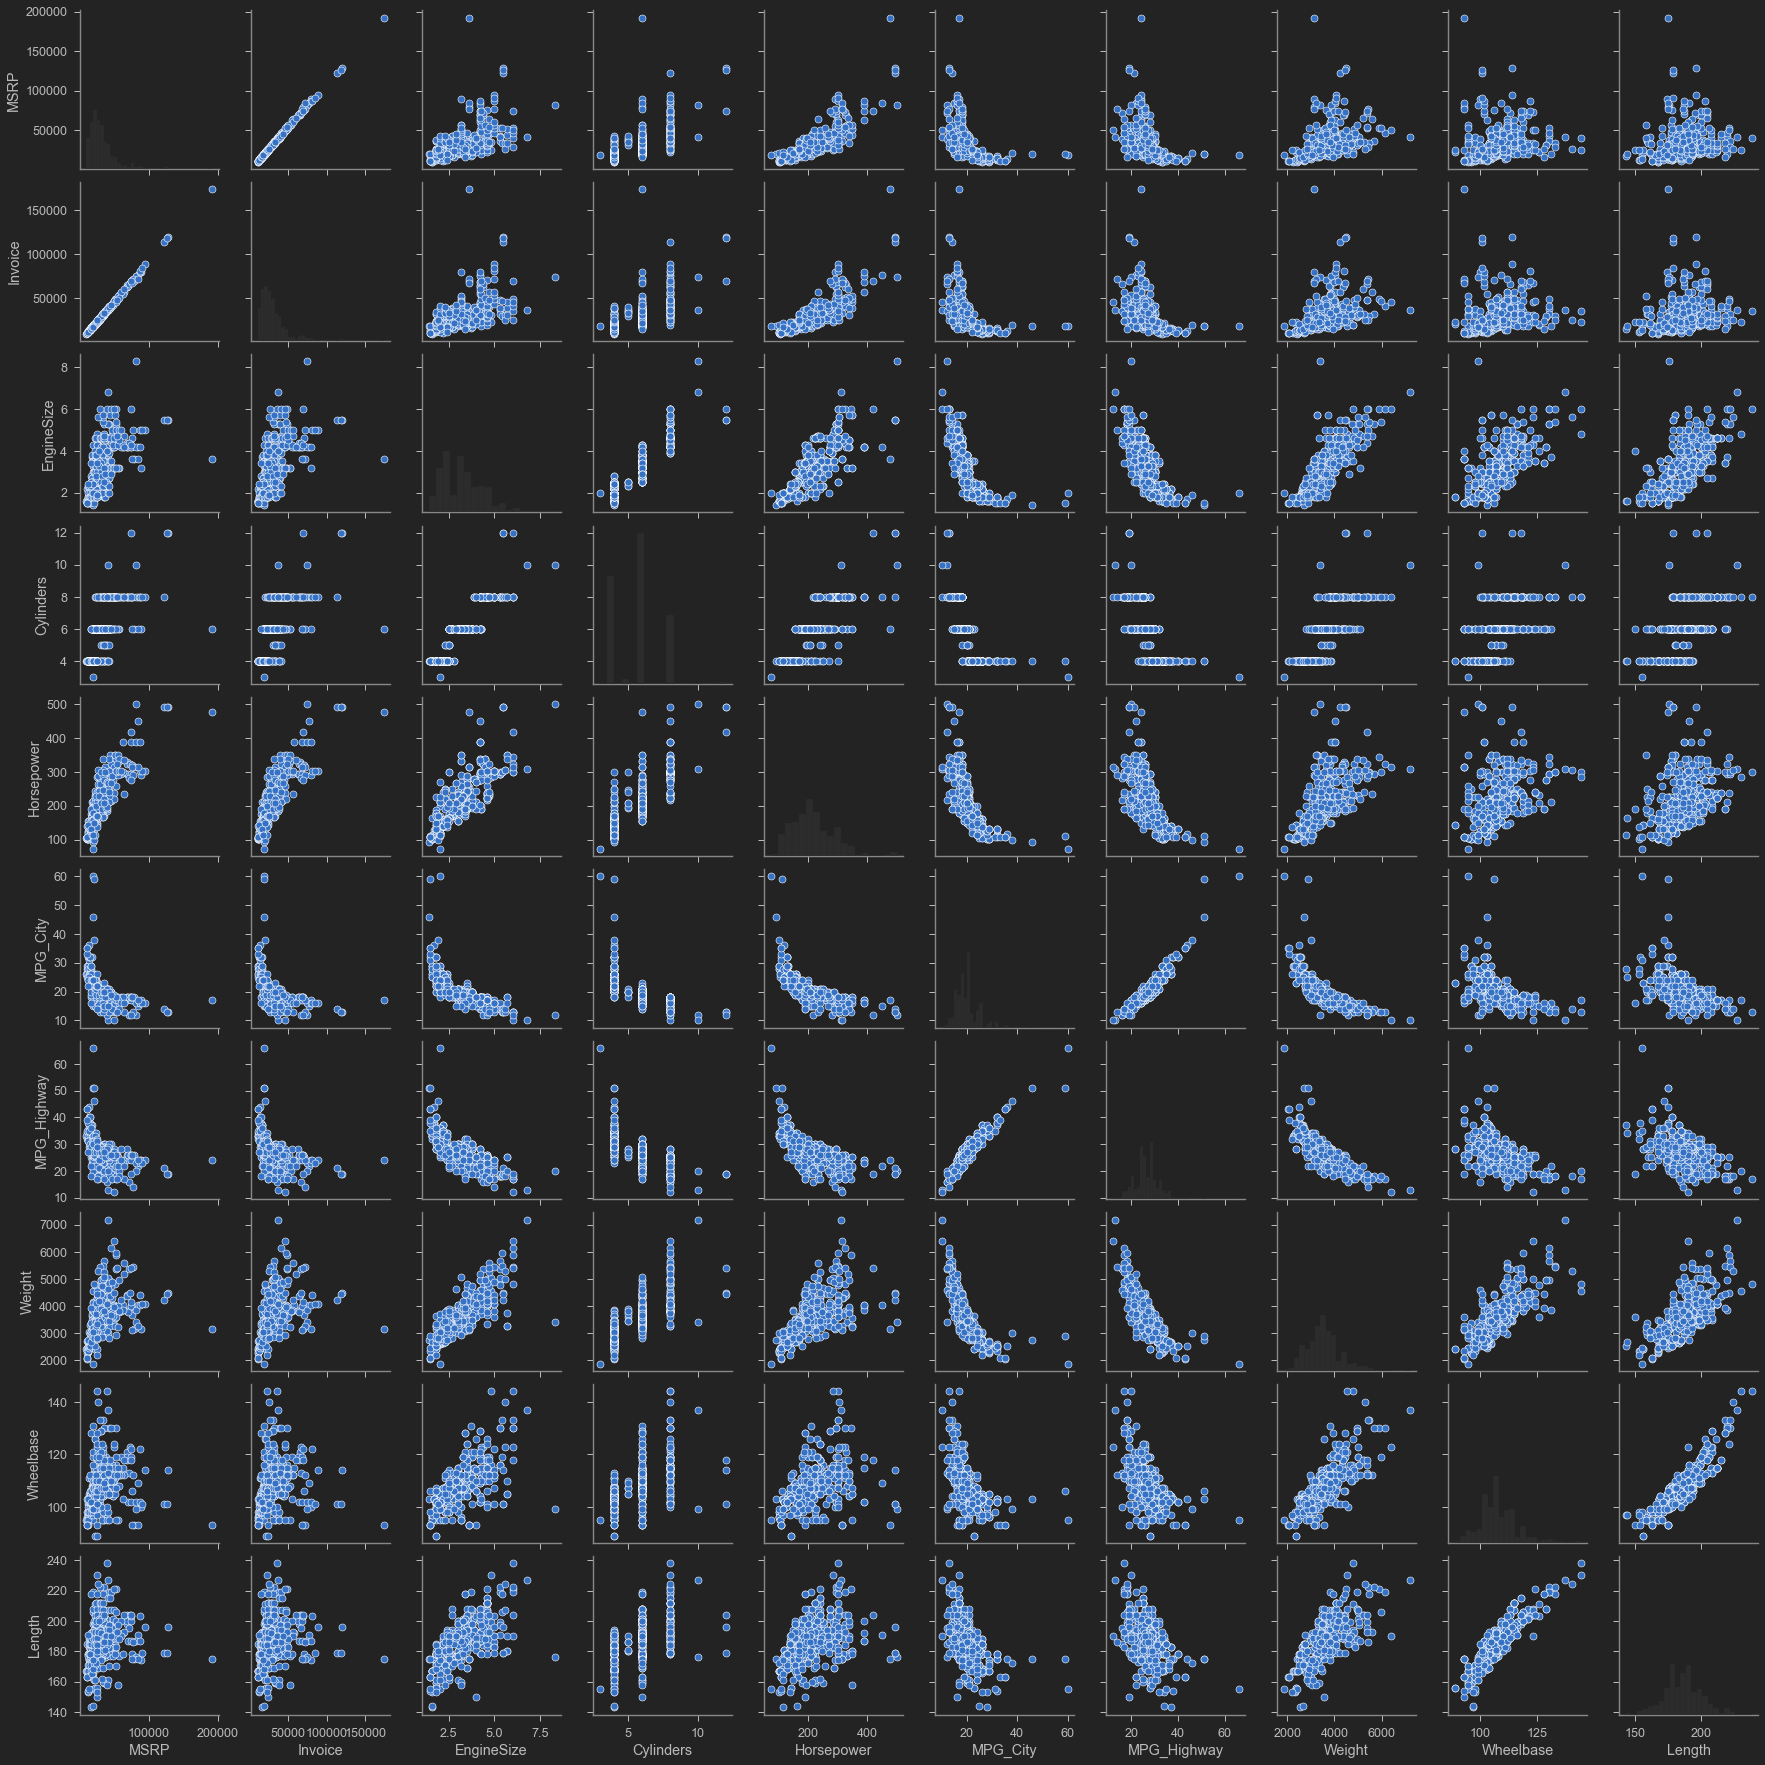

In [41]:
# plotting the relationships between data 
sns.pairplot(data = car_df)

In [42]:
#Displaying distinct car Manufacturers
car_df.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [44]:
#Plotting distinct car Manufacturers

fig = px.histogram(data_frame = car_df, x = "Make",
                  labels = {'Make': 'Manufacturer'},
                  title = "MANUFACTURER OF THE CAR",
                  color_discrete_sequence = ['blue'])
fig.show()

In [45]:
#Displaying distinct car types
car_df.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [46]:
#Plotting distinct car types

fig = px.histogram(data_frame = car_df, x = "Type",
                  labels = {'Type': 'Type'},
                  title = "TYPES OF THE CAR",
                  color_discrete_sequence = ['blue'])
fig.show()

In [48]:
#Displaying distinct car origin
car_df.Origin.unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [49]:
#Plotting distinct car origin

fig = px.histogram(data_frame = car_df, x = "Origin",
                  labels = {'Origin': 'Origin'},
                  title = "ORIGIN OF THE CAR",
                  color_discrete_sequence = ['blue'])
fig.show()

In [50]:
#Plotting car manufacturer and the car origin
fig = px.histogram(data_frame = car_df, x = "Make",
                  labels = {'Make': 'Manufacturer'},
                  title = "MANUFACTURER OF THE CAR VS LOCATION",
                  color = "Origin")
fig.show()

<AxesSubplot:>

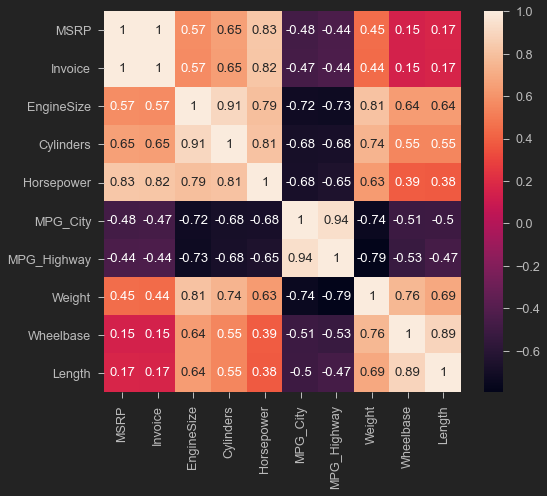

In [52]:
#Obtaining and plotting the correlation matrix
sns.heatmap(car_df.corr(),annot = True)

## Preparing the data 